In [ ]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1eUtu0v5L0fgZpC2mzTZXsAIYZWaEifnV'}) # replace the id with id of file you want to access
downloaded.GetContentFile('creditcard.csv')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.info()

In [ ]:
#class count
class_count_0, class_count_1 = data['Class'].value_counts()
#print("class_count_0",class_count_0)
#print("class_count_1",class_count_1)

#Separate class
class_0 = data[data['Class']==0] 
class_1 = data[data['Class']==1] #print the shape of the class
print('class 0:',class_0.shape) 
print('class 1:',class_1.shape) 

class 0: (284315, 31)
class 1: (492, 31)


*Here,  "Class 0" has 284315 entries which is relatively a very large number comparing to the total entry numbers in "Class 1", Which is only 492.
This is why, It's highly imbalanced data.*



---



#**Note:**

* **Hyperparameter tuning:** Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.
These are used to measure accuracy and other evaluating parameters.
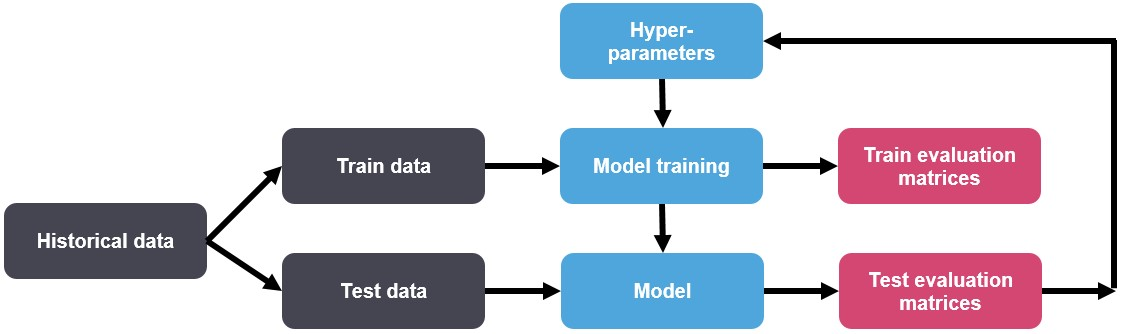

#**Under sampling**

**Random under sampling**

Total class of 1 and 0: 1    492
0    492
Name: Class, dtype: int64



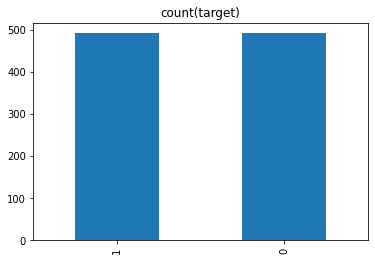

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under,class_1],axis = 0)

print("Total class of 1 and 0:",test_under["Class"].value_counts()) #plot the count after undersampling
print()
test_under["Class"].value_counts().plot(kind ='bar',title = 'count(target)')

**Random under-sampling with imblearn**

Random Under sampling: Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset. In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached.


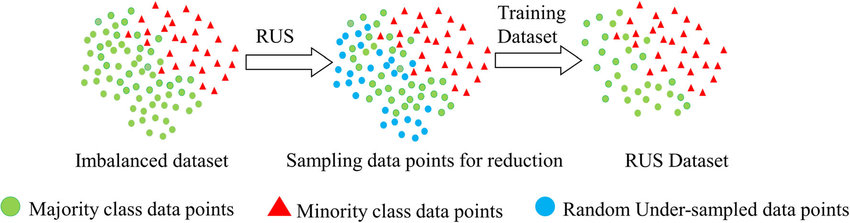

In [ ]:
from collections import Counter as counter
import imblearn

x = data.drop(["Class"],axis = 1) #Predictor variable
y = data["Class"] #Target variable

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42, replacement = True) #Fit predictor ad target variable | random_state => Hyperparameter tuning
x_rus, y_rus = rus.fit_resample(x,y) #Resampling

print("Original dataset shape:",counter(y)," Note: This is before resampling.") 
print("Resample dataset shape:",counter(y_rus)," Note: This is after resampling.")

Original dataset shape: Counter({0: 284315, 1: 492})  Note: This is before resampling.
Resample dataset shape: Counter({0: 492, 1: 492})  Note: This is after resampling.


**Near-miss**

Near-miss is an algorithm that can help in balancing an imbalanced dataset. When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution.

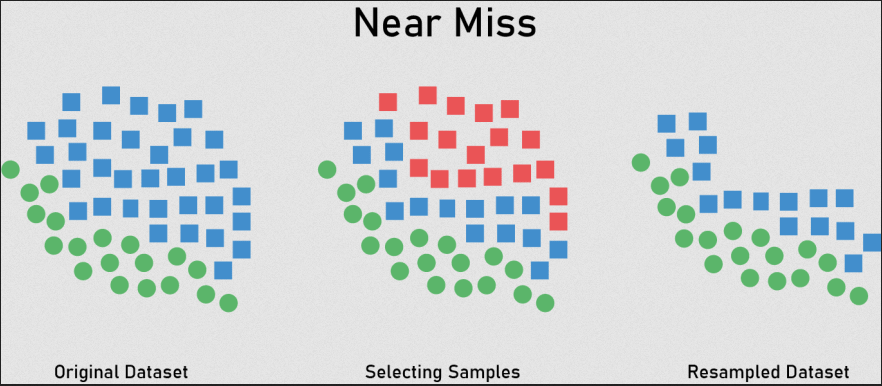

In [ ]:
from collections import Counter as counter
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x = data.drop(["Class"],axis = 1) #Predictor variable
y = data["Class"] #Target variable

x_nm, y_nm = nm.fit_resample(x,y)

print("Original dataset shape",counter(y))
print("Resampled dataset shape",counter(y_nm))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


#**Over sampling**

**Random over sampling**

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

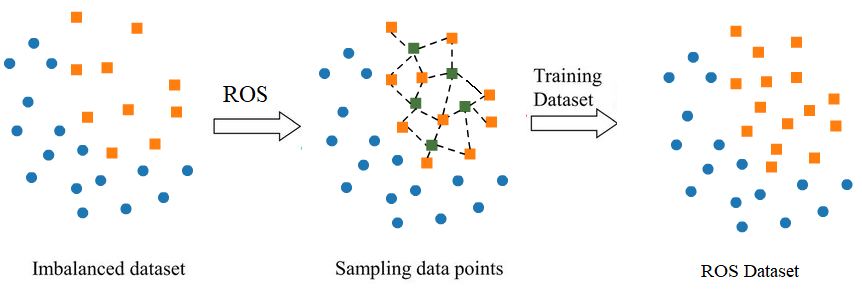

Total class of 1 and 0: 1    284315
0    284315
Name: Class, dtype: int64


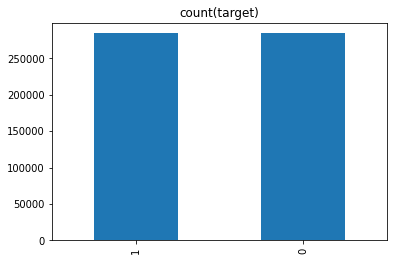

In [ ]:
 class_1_over = class_1.sample(class_count_0, replace = True)

test_over = pd.concat([class_1_over,class_0],axis = 0)

print("Total class of 1 and 0:",test_over["Class"].value_counts()) #plot the count after over sampling
test_over["Class"].value_counts().plot(kind ='bar',title = 'count(target)')

*Here, "Class 1" has 492 entries which is relatively a very small number comparing to the total entry numbers in "Class 0", Which is 284315 only. This is why, It's highly imbalanced data.*

**Random over-sampling with imblearn**

In [ ]:
from collections import Counter as counter
import imblearn

x = data.drop(["Class"],axis = 1) #Predictor variable
y = data["Class"] #Target variable

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42) #Fit predictor ad target variable | random_state => Hyperparameter tuning
x_ros, y_ros = ros.fit_resample(x,y) #Resampling

print("Original dataset shape:",counter(y)," Note: This is before resampling.") 
print("Resample dataset shape:",counter(y_ros)," Note: This is after resampling.")

Original dataset shape: Counter({0: 284315, 1: 492})  Note: This is before resampling.
Resample dataset shape: Counter({0: 284315, 1: 284315})  Note: This is after resampling.


**Synthetic minority oversampling technique (SMOTE)**

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.



In [ ]:
from collections import Counter as counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x = data.drop(["Class"],axis = 1) #Predictor variable
y = data["Class"] #Target variable


x_smote, y_smote = smote.fit_resample(x,y) #Fit predictor and target variable

print('Original dataset shape', counter(y))
print('Resample dataset shape', counter(y_ros))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})
